In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load the dataset
data = pd.read_csv('../00_Data/Integrated_data/Fully_integrated_data.csv')

In [11]:
# Remove Traffic rate missing values
# data = data.dropna(subset=['Traffic rate'])

In [12]:
# Categorize Traffic Rate by Quartile
data['Traffic_rate_cat'] = pd.qcut(data['Total Traffic Volume'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Select and scale properties to use for analysis
features = data[['Gross Domestic Product (GDP)', 'Nationwide Consumer Price Index', 'number of car ownership']] 
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [13]:
# Data Segmentation
X_train, X_test, y_train, y_test = train_test_split(features_scaled, data['Traffic_rate_cat'], test_size=0.2, random_state=42)

# Create a k-NN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Model evaluation
predictions = knn.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        High       0.50      0.57      0.54       216
         Low       0.69      0.73      0.71       239
      Medium       0.52      0.46      0.49       247
   Very High       0.84      0.78      0.81       248

    accuracy                           0.64       950
   macro avg       0.64      0.64      0.63       950
weighted avg       0.64      0.64      0.64       950



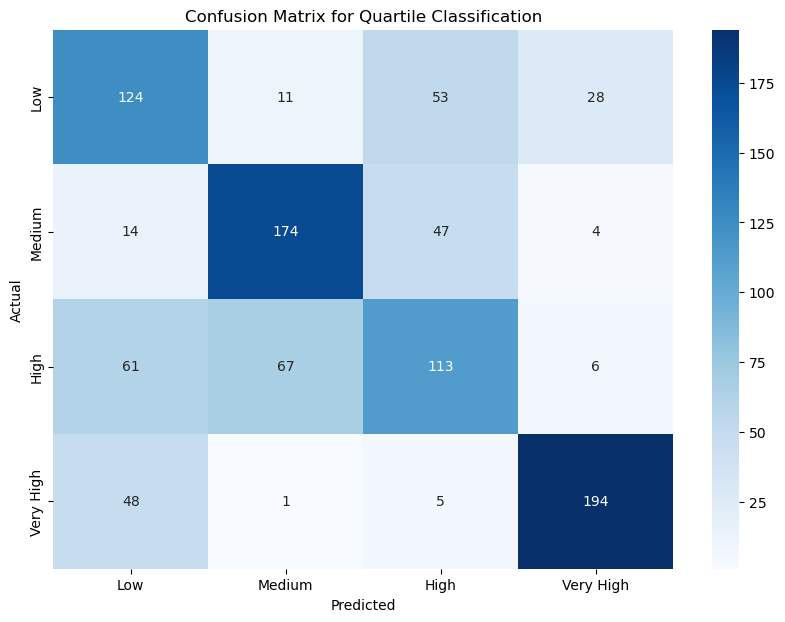

In [19]:
# Visualization of confusion matrices
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High', 'Very High'], yticklabels=['Low', 'Medium', 'High', 'Very High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Quartile Classification')
plt.show()

In [20]:
# Categorize Traffic Rate into Trimesters
data['Traffic_rate_tertile'] = pd.qcut(data['Total Traffic Volume'], 3, labels=['Low', 'Medium', 'High'])
#pd. qcut : Binning age data into groups

# Select and scale characteristics
eatures = data[['Gross Domestic Product (GDP)', 'Nationwide Consumer Price Index', 'number of car ownership']] 
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Hold out method : Data split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, data['Traffic_rate_tertile'], test_size=0.2, random_state=42)

# Create and train k-NN models
knn_tertile = KNeighborsClassifier(n_neighbors=5)
knn_tertile.fit(X_train, y_train)


# Model evaluation
predictions_tertile = knn_tertile.predict(X_test)
print("Classification Report for Tertile:")
print(classification_report(y_test, predictions_tertile))

Classification Report for Tertile:
              precision    recall  f1-score   support

        High       0.80      0.91      0.85       300
         Low       0.76      0.76      0.76       334
      Medium       0.67      0.59      0.62       316

    accuracy                           0.75       950
   macro avg       0.74      0.75      0.75       950
weighted avg       0.74      0.75      0.74       950



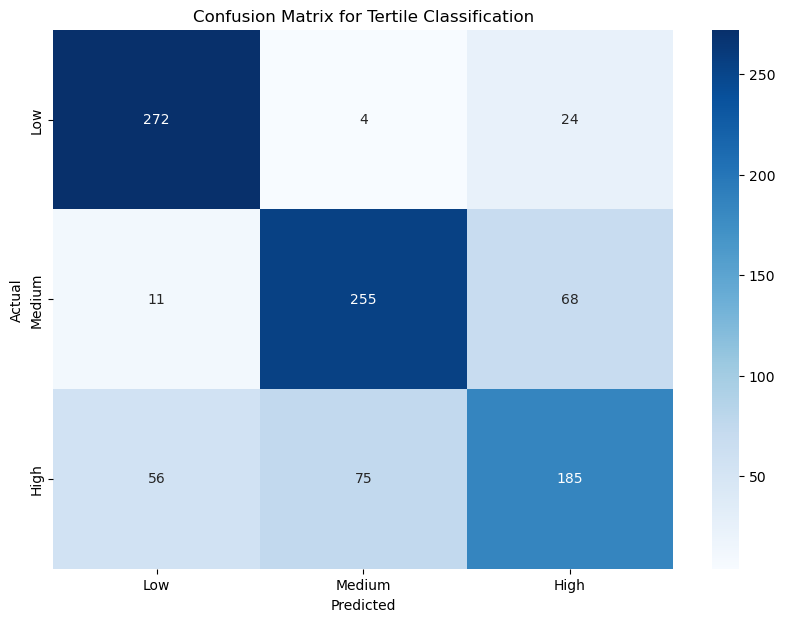

In [21]:
# Visualization of confusion matrices
conf_matrix_tertile = confusion_matrix(y_test, predictions_tertile)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_tertile, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Tertile Classification')
plt.show()

In [22]:
# Categorize traffic rates into quintiles
data['Traffic_rate_quintile'] = pd.qcut(data['Total Traffic Volume'], 5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Hold out method : Data split
X_train_q, X_test_q, y_train_q, y_test_q = train_test_split(features_scaled, data['Traffic_rate_quintile'], test_size=0.2, random_state=42)

# Create and train k-NN models
knn_quintile = KNeighborsClassifier(n_neighbors=5)
knn_quintile.fit(X_train_q, y_train_q)

# Model evaluation
predictions_quintile = knn_quintile.predict(X_test_q)
print("Classification Report for Quintile:")
print(classification_report(y_test_q, predictions_quintile))

Classification Report for Quintile:
              precision    recall  f1-score   support

        High       0.44      0.61      0.51       164
         Low       0.47      0.48      0.47       199
      Medium       0.47      0.41      0.44       180
   Very High       0.82      0.71      0.76       208
    Very Low       0.72      0.67      0.69       199

    accuracy                           0.58       950
   macro avg       0.58      0.57      0.57       950
weighted avg       0.59      0.58      0.58       950



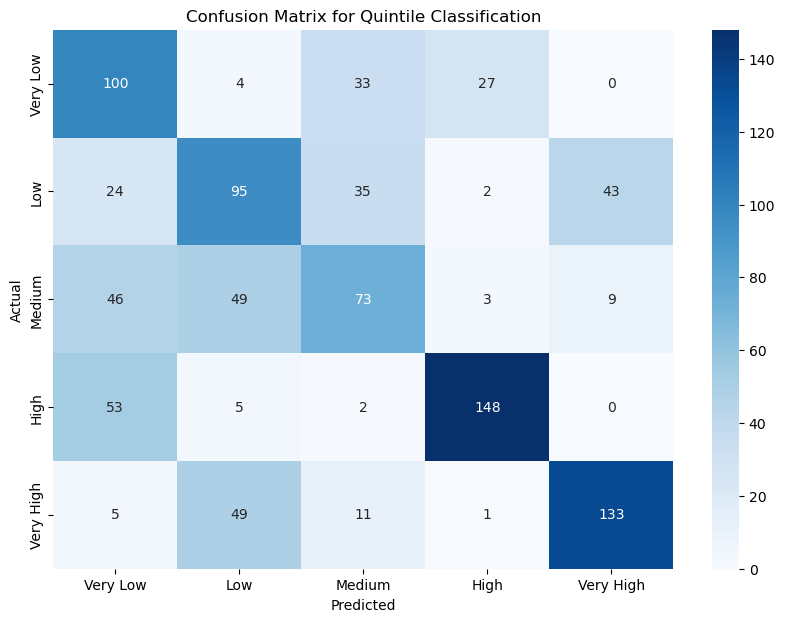

In [23]:
# Visualization of confusion matrices
conf_matrix_quintile = confusion_matrix(y_test_q, predictions_quintile)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_quintile, annot=True, fmt='d', cmap='Blues', xticklabels=['Very Low', 'Low', 'Medium', 'High', 'Very High'], yticklabels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Quintile Classification')
plt.show()